## PASO 1: Plantear la pregunta.
        ¿Puede predecirse el consumo energético de un país en función de su población y su nivel de industrialización?
## PASOS 2 y 3: Concretar y buscar los datos necesarios.
        Cargamos los ficheros .csv utilizando las librerías y funciones correspondientes.           

In [1]:
import pandas as pd

#Ficheros de datos
pop_den = pd.read_csv("Datos\\population_density.csv")
urb_gro = pd.read_csv("Datos\\urban_growth.csv")
pop = pd.read_csv("Datos\\population.csv")
pop_gro = pd.read_csv("Datos\\population_growth.csv")
life_exp = pd.read_csv("Datos\\life_expectancy.csv")
co2_emi = pd.read_csv("Datos\\co2_emissions.csv")
energy_ratio = pd.read_csv("Datos\\energy_person_ratio.csv")

#La estimación del consumo energético de un país lo haremos en función del ratio energético por persona, cuyos datos se reflejan en el último fichero.

## PASOS 4 y 5: Limpieza y exploración de los datos..
        1) Transponemos las tablas utilizando la función data.melt_df().
        2) Juntamos las tablas mediante la función data.merge_all(), describiendo nuestro propio diccionario.
        3) Visualizamos la información básica de nuestra tabla global mediante las funciones .head() y .describe() 

In [2]:
import data #data es una librería de funciones propias que nos permiten unir y transponer los dataframes anteriores de manera fácil y rápida (Si quieres profundizar, abre el fichero data.py) 
pop_den_melt = data.melt_df(pop_den, "population_density")
urb_gro_melt = data.melt_df(urb_gro, "urban_growth")
pop_melt = data.melt_df(pop, "population")
pop_gro_melt = data.melt_df(pop_gro, "population_growth")
co2_emi_melt = data.melt_df(co2_emi, "co2_emissions")
life_exp_melt = data.melt_df(life_exp, "life_expectancy")

energy_ratio_melt = data.melt_df(energy_ratio, "energy_ratio")

In [3]:
#Describimos un objeto tipo diccionario feature_dict, que usaremos como argumento en la función data.merge_all()
feature_dict = {"pop_den_melt":pop_den_melt, "urb_gro_melt": urb_gro_melt, "pop_melt": pop_melt, "pop_gro_melt": pop_gro_melt, "co2_emi_melt": co2_emi_melt, "life_exp_melt": life_exp_melt, "energy_ratio":energy_ratio_melt}

merged_data = data.merge_all(feature_dict = feature_dict, keys = ["country", "year"]).reset_index(drop=True)


#Unimos Pais+Año tomandoló como indice del DataFrame
merged_data["country_year"] = merged_data["country"] + "_" + merged_data["year"]
merged_data.set_index("country_year", inplace = True)
merged_data.drop(columns=["country", "year"], inplace = True)
merged_data.head()

,population_density,urban_growth,population,population_growth,co2_emissions,life_expectancy,energy_ratio
country_year,,,,,,,
Australia_1961,1.36,0.02490,10400000.0,1.990,8.67,71.4,3120.0
Austria_1961,86.30,0.00694,7110000.0,0.548,4.48,70.0,1550.0
Belgium_1961,305.00,0.00434,9230000.0,0.332,10.10,70.6,2570.0
Canada_1961,2.01,0.02880,18200000.0,2.000,10.60,71.3,4310.0
Denmark_1961,109.00,0.01680,4610000.0,0.698,6.88,72.3,2020.0


In [4]:
merged_data.describe()

,population_density,urban_growth,population,population_growth,co2_emissions,life_expectancy,energy_ratio
count,5880.000000,5880.000000,5.880000e+03,5880.000000,5880.000000,5880.000000,5880.000000
mean,151.510255,0.025590,4.028536e+07,1.651167,5.871009,68.819014,2242.902859
std,467.544295,0.022368,1.336053e+08,1.616812,7.943471,8.406140,2630.882603
min,1.240000,-0.065100,5.450000e+04,-9.080000,0.004650,32.500000,9.550000
25%,21.800000,0.009955,3.700000e+06,0.584000,0.838500,63.900000,505.750000
50%,65.800000,0.022500,9.825000e+06,1.510000,3.360000,70.900000,1180.000000
75%,128.000000,0.038400,2.972500e+07,2.532500,8.170000,74.800000,3040.000000
max,7890.000000,0.178000,1.400000e+09,17.600000,87.700000,84.200000,22100.000000


## PASO 6: Preprocesamiento de datos.
        1) Generamos el objeto que realiza la normalización a través de Sklearn.
        2) Normalización de los datos y visualizamos.

In [5]:
from sklearn.preprocessing import MinMaxScaler
#Generar un objeto de escalado
scaler = MinMaxScaler()

In [12]:
#Creamos el nuevo DataFrame y le aplicamos la normalización. 
scaled_data = merged_data.copy()
scaled_data[scaled_data.columns] = scaler.fit_transform(merged_data[merged_data.columns])

#Visualizamos el resultado. 
scaled_data.head()

,population_density,urban_growth,population,population_growth,co2_emissions,life_expectancy,energy_ratio
country_year,,,,,,,
Australia_1961,0.000015,0.370218,0.007390,0.414918,0.098812,0.752418,0.140805
Austria_1961,0.010782,0.296339,0.005040,0.360870,0.051033,0.725338,0.069734
Belgium_1961,0.038505,0.285644,0.006554,0.352774,0.115118,0.736944,0.115908
Canada_1961,0.000098,0.386261,0.012962,0.415292,0.120820,0.750484,0.194675
Denmark_1961,0.013660,0.336898,0.003254,0.366492,0.078400,0.769826,0.091010


In [19]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5880 entries, Australia_1961 to United States_2015
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   population_density  5880 non-null   float64
 1   urban_growth        5880 non-null   float64
 2   population          5880 non-null   float64
 3   population_growth   5880 non-null   float64
 4   co2_emissions       5880 non-null   float64
 5   life_expectancy     5880 non-null   float64
 6   energy_ratio        5880 non-null   float64
dtypes: float64(7)
memory usage: 367.5+ KB


## PASO 7: Elección y generación del modelo de Machine Learning.
        1) Separar las variables predictoras X y la variable objetivo y.
        2) Dividir el Dataset en 2 partes:
            Train: parte del dataset que se utilizará para llevar a cabo el entrenamiento del modelo de ML. (70%)
            Test: parte del dataset que se utilizará para, una vez entrenado, probar la eficacia del modelo de ML en la predicción. (30%)

        3) Elegimos el modelo ---> Regresión Logistica: Importamos desde skalearn y generamos el objeto.  
        4) Entrenamiento del modelo y obtención de los parámetros.

In [13]:
#Separación de variables predictoras y variable objetivo.
X, y = scaled_data[["population_density","urban_growth","population","population_growth","co2_emissions","life_expectancy"]].values, scaled_data["energy_ratio"].values

In [15]:
from sklearn.model_selection import train_test_split

#División del Dataset en Train y Test, con proporción 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("Número de datos en Train: %d rows\nNúmero de datos en Test: %d rows" % (X_train.shape[0], X_test.shape[0]))

Número de datos en Train: 4116 rows
Número de datos en Test: 1764 rows


In [32]:
from sklearn.linear_model import LinearRegression
#Creamos el algoritmo de tipo Regresión Lineal
model = LinearRegression(n_jobs = -1)

#Entrenamos el modelos con los datos
model.fit(X = X_train, y = y_train)

#Obtenemos los parámetros de nuestra Regresión Lineal
print("Pendiente de la recta: " + str(round(model.intercept_,6)))
print("Coeficientes de la recta: " + str(model.coef_)) 

Pendiente de la recta: 0.003431
Coeficientes de la recta: [ 0.01497243 -0.03045922 -0.01783222 -0.07358837  1.06977535  0.09571358]


## PASO 8: Evaluación del modelo.
        1) Realizaremos predicciones sobre el subconjunto test.
        2) Evaluación de la capacidad de predicción del modelo, por comparación con los resultados reales conocidos del subconjunto Test.
            --> Gráficamente.
            --> Numericamente.

In [33]:
#Calculamos las predicciones
predicciones = model.predict(X_test)

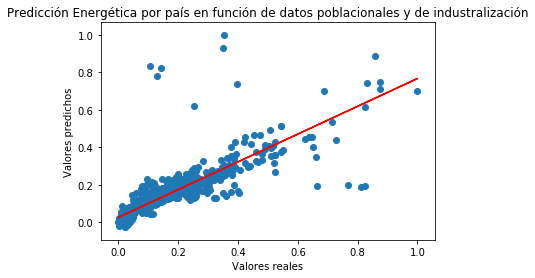

In [40]:
import matplotlib.pyplot as plt
import numpy as np

#Evaluación GRÁFICA de valores reales Vs. predichos.
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Predicción Energética por país en función de datos poblacionales y de industralización')
z = np.polyfit(y_test, predicciones, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color ='red')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

#Evaluación mediante parámetros:
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print("MSE:", round(mse,4))
print("RMSE:", round(rmse,4))
print("R2:", round(r2,4))

MSE: 0.0039
RMSE: 0.0627
R2: 0.7281


## PASO 9: Comunicación de resultados.
        1) ¿Qué resultado nos ha dado ESTE modelo?
       